# 1 - Perkenalan

> Bab pengenalan harus diisi dengan identitas, query yang telah kalian buat pada Google Cloud Platform!, dan objective yang ingin dicapai.

Nama : Hillidatul Ilmi

Batch : FTDS-012

Dataset : census_adult_income dari Bigquery Public Data

Objective : Memprediksi income bracket atau golongan pendapatan. Sebagai Data Science, saya akan melakuan analisis mengenai hubungan antara variabel golongan pendapatan(terget/y) yang  jenis data berbentuk kategorik terhadap satu atau lebih variabel (fitur/X) berupa faktor-faktor yang mempengaruhi golongan pendapatan. Saya akan melakukan prediksi golongan pendapatan <=50k dan >50 dari beberapa fitur yang bisa mendukung.
Dalam pendekatan analisis ini, variabel target terbatas atau kategoris, berupa A atau B (biner). Berdasarkan hal ini, maka saya akan menanalisis golongan pendapatan dengan dua metode yaitu Regresi Logistik dan Support Vector Machine klasifikasi.

Dataset dapat diperoleh melalui bigquery, menggunakan dataset ml_datasets dari database bernama census_adult_income. Menggunakan beberapa fitur yang di query, berikut salin query yang telah dibuat di Google Cloud Platform :

 `SELECT age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket` # Menampilkan beberapa yang fitur yang akan dianalisis dan target golongan harga

`FROM 'bigquery-public-data.ml_datasets.census_adult_income'` # Mengambil dataset dari bigquery pada tabel cencus_adult_income

`WHERE workclass!=' ?' AND hours_per_week<=100 LIMIT 23976;` # Dimana untuk kolom workclass tidak menampilkan baris ? dan kolom hours_per_week hanya menampilkan nilai kurang dari 100 dengan limit/banyaknya data 12*1998=23976

# 2 - Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

Import libraries digunakan untuk mengimpor isi modul dan  digunakan untuk mendukung beberapa perintah sintaks yang akan di jalankan. Pada proses machine learning graded challenge 2 akan menggunakan library sebagai berikut :

In [1]:
# Mendefinisikan Libraries

!pip install feature-engine
import pandas as pd # library series pandas yang berfungsi menampilkan n*n dataset
import numpy as np # libray NumPy berfungsi untuk membuat mendefinisikan objek N-dimensi array
import matplotlib.pyplot as plt # library matplotlib berfungsi untuk membuat beberapa perubahan berupa visualisasti data
import seaborn as sns # library seabron berfungsi sebagai visualisasi data yang dibangun di atas matplotlib untuk membuat grafik 
import plotly.express as px #library plotly berfungsi untuk pembuatan plot yang tersedia dalam data
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split # library yang digunakan untuk membagi seluruh dataset menjadi Training Set dan Testing Set dalam proses hasil prediksi 
from feature_engine.outliers import Winsorizer # library yang digunakan untuk capping/membatasi outlier dari distribusi maksimum/minimum pada nilai yang berubah-ubah
from sklearn.preprocessing import OrdinalEncoder # library yang berfungsi mengurutkan data kategorik menjadi data numerik
from sklearn.preprocessing import MinMaxScaler # library yang berfungsi untuk menskalakan nilai data ke dalam suatu range menjadi sama antar fitur/X
from sklearn.preprocessing import OneHotEncoder # library yang berfungsi untuk mendefinisikan kolom kategorik menjadi kolom numerik
from sklearn.preprocessing import LabelEncoder # library yang berfungsi untuk mendefinisikan y_test kolom kategorik menjadi kolom numerik
from sklearn.linear_model import LogisticRegression # library yang berfungsi untuk memodelkan target kategorik untuk dilihat hasil prediksinya
from sklearn.metrics import accuracy_score # library berupa matriks untuk melihat hasil score prediksi dari Logistik
from sklearn.svm import SVC # library yang berfungsi untuk memodelkan target berupa kategorik untuk dilihat hasil prediksinya
from sklearn.metrics import classification_report # library yang berfungsi untuk memodelkan target kategorik untuk dilihat hasil prediksinya
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix # library yang berfungsi untuk melihat visualisasi target model berdasarkan pengelompokan hasil prediksi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


library yang akan saya gunakan untuk mengerjakan graded chalengge 2 ini dari library numpy, pandas, matplotlib, seaborn dan beberapa modul sklearn yang bervariasi untuk penggunaan dalam mendukung jalannya suatu model. 

# 3 - Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

Menampilkan atau memproses dataset berupa CSV dari drive

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Menampilkan data yang akan digunakan dalam analisis atau memuat dari kumpulan data 
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/census_adult_income.csv')
data

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23971,38,Private,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
23972,35,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
23973,31,Private,HS-grad,9,Separated,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
23974,48,Private,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,44,United-States,<=50K


Dataset census_adult_income berupa kumpulan informasi mengenai catatan sensus penghasilan dewasa yang ada di masyarakat. Dari dataset ini diharapkan ada sebuah informasi mengenai beberapa kolom berisikan penghasilan orang dewasa, baik secara usia, perkerjaan, pendidikan, status, pendapatan dan lain-lainnya. Diharapkan akan menghasilkan analisis yang bisa menjadi pertimbangan para perkerja dewasa maupun pemerintah dalam mengatur sistem keternagakerjaan

In [4]:
# Duplicate Data
data_copy = data.copy()

Mengandakan(duplicate) dataset nya, jika ada perubahan kolom atau atribut tetap bisa dibandingkan dengan dataset asli. Fungsi dari pengandaan agar data asli masih bisa digunakan jika ada beberapa perubahan isi dari dataset.

In [5]:
# Mengecek ukuran dataset yang akan digunakan
print(data.shape)

(23976, 14)


Berdasarkan perintah .shape bahwa ukuran dataset  catatan sensus penghasilan dewasa  terdiri dari 693071 baris dan 57 kolom.

In [6]:
# Melihat Nama-Nama kolom dari tabel dataset census_adult_income
data.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income_bracket'],
      dtype='object')

Berdasarkan perintah data.columns terdapat beberapa nama kolom yang membinggungkan secara arti makna kata. Agar saya lebih mudah memahami masing-masing kolom, maka akan saya ubah beberapa nama kolomnya. Perubahan nama kolom agar mempermudah dalam mendefinisikan data. Saya akan mengubah seluruh nama kolom, agar lebih gampang memahami isi datanya.

In [7]:
# Mengubah Nama Kolom dari tabel dataset census_adult_income
data.rename(columns={'age': 'Usia','workclass': 'KelasKerja', 'education':'Pendidikan','education_num': 'NomorPendidikan',
                             'marital_status':'StatusPernikahan','occupation': 'Perkerjaan', 'relationship':'Hubungan',
                             'sex': 'JenisKelamin','capital_gain':'Keuntungan','capital_loss': 'Kerugian', 'hours_per_week':'JamPerMinggu',
                             'native_country': 'NegaraAsal', 'income_bracket':'GolonganPendapatan'}, inplace=True)
data

,Usia,KelasKerja,Pendidikan,NomorPendidikan,StatusPernikahan,Perkerjaan,Hubungan,race,JenisKelamin,Keuntungan,Kerugian,JamPerMinggu,NegaraAsal,GolonganPendapatan
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23971,38,Private,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
23972,35,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
23973,31,Private,HS-grad,9,Separated,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
23974,48,Private,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,44,United-States,<=50K


In [8]:
# Melihat Nama-Nama kolom dari tabel dataset census_adult_income yang telah diubah
data.columns

Index(['Usia', 'KelasKerja', 'Pendidikan', 'NomorPendidikan',
       'StatusPernikahan', 'Perkerjaan', 'Hubungan', 'race', 'JenisKelamin',
       'Keuntungan', 'Kerugian', 'JamPerMinggu', 'NegaraAsal',
       'GolonganPendapatan'],
      dtype='object')

Nama-Nama kolom telah diubah seperti merubah nama kolom usis, Kelas kerja, pendidikan, Nomor Pendidikan, status pernikahan, perkerjaan, hubungan, jenis kelamin, keuntungan, kerugian, jam kerja perminggu, negara asal serta golongan pendapatan. Setelah dilakukan perubahan nama kolom membuat saya lebih mudah memahami makna data dan lebih mudah menafsirkan definisi setip data.

In [9]:
# Mengecek informasi dataset dari tabel dataset census_adult_income
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23976 entries, 0 to 23975
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Usia                23976 non-null  int64 
 1   KelasKerja          23976 non-null  object
 2   Pendidikan          23976 non-null  object
 3   NomorPendidikan     23976 non-null  int64 
 4   StatusPernikahan    23976 non-null  object
 5   Perkerjaan          23976 non-null  object
 6   Hubungan            23976 non-null  object
 7   race                23976 non-null  object
 8   JenisKelamin        23976 non-null  object
 9   Keuntungan          23976 non-null  int64 
 10  Kerugian            23976 non-null  int64 
 11  JamPerMinggu        23976 non-null  int64 
 12  NegaraAsal          23976 non-null  object
 13  GolonganPendapatan  23976 non-null  object
dtypes: int64(5), object(9)
memory usage: 2.6+ MB


Berdasarkan perintah data.info() bahwa tabel catatan sensus penghasilan dewasa memiliki sekitar 13 kolom, dimana terdapat 5 kolom bertipe integral atau numerik dan terdapat 9 kolom bertipe object atau kategorik.

# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.



Dikutip dari medium.com, Exploratory Data Analysis (EDA) adalah bagian dari proses data science. EDA menjadi sangat penting sebelum melakukan feature engineering dan modeling karena dalam tahap ini kita harus memahami datanya terlebih dahulu.

Untuk EDA saya menampilkan beberapa visualisasi berupa informasi fitur berkategori data numerik dalam bentuk histogram dan visuaisasi untuk infomasi data berkategorik  berupa diagram batang serta diagram pie. Berikut Visualisasi dataset dari tabel catatan census penghasilan orang dewasa :

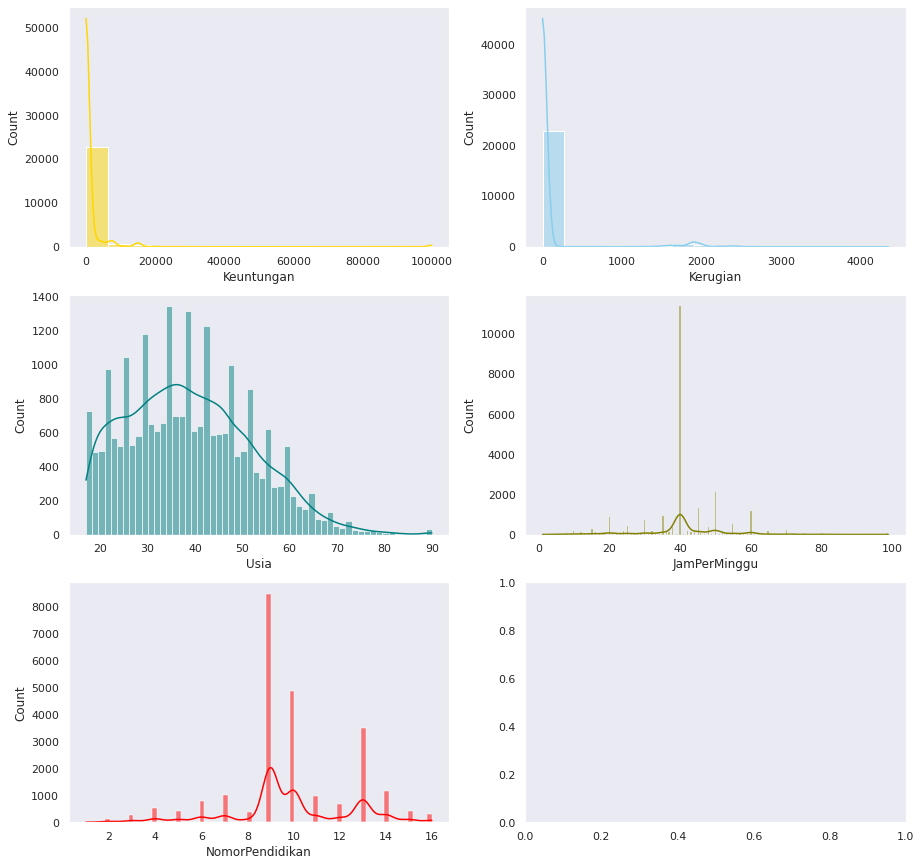

In [10]:
# Visualisasi histogran untuk fitur berupa data numerik dari tabel dataset census_adult_income
sns.set_theme(style="dark")
fig,axs=plt.subplots(3,2, figsize=(15,15))
sns.histplot(data=data, x='Keuntungan', color='gold', kde=True, ax=axs[0,0])
sns.histplot(data=data, x='Kerugian', color='skyblue', kde=True, ax=axs[0,1])
sns.histplot(data=data, x='Usia', color='teal', kde=True, ax=axs[1,0])
sns.histplot(data=data, x='JamPerMinggu', color='olive', kde=True, ax=axs[1,1])
sns.histplot(data=data, x='NomorPendidikan', color='red', kde=True, ax=axs[2,0])
plt.show()

Referensi yang saya gunakan dalam menampilkan histogram berasal dari [Rpubs by Rstudio](https://rpubs.com/aliciaarifin/asdvisualPython)

Keterangan Visualisasi Fitur berkategori data numerik sebagai berikut :
1. Visualisasi histogram data keuntungan yang dapat diartikan mengenai hasil keuntungan bersih pendapatan dari layanan tenaga manusia/karyawan/perkerja. Kolom keuntungan memiliki bentuk data tidak berdistribusi normal dengan arah miring sebelah kiri, yang berarti kumpulan data berada di sisi ekor kiri. Berdasarkan visualisasi histogram juga terlihat kebanyakan data keuntungan berkumpul pada set bernilai 0 dan sebagian ada pada set bernilai ratusan, berarti para perkerja tidak terlalu mendapatkan keuntungan yang lebih/bonus dari hasil tenaga yang mereka keluarkan.
2. Visualisasi histogram data kerugian yang dapat diartikan mengenai kondisi di mana manusia/karyawan/perkerja tidak mendapatkan keuntungan dari apa yang telah mereka keluarkan. Kolom kerugian memiliki bentuk data tidak berdistribusi normal dengan arah miring sebelah kiri, yang berarti kumpulan data berada di sisi ekor kiri. Berdasarkan visualisasi histogram juga terlihat kebanyakan data kerugian berkumpul pada set bernilai 0 dan sebagian ada pada set bernilai ratusan, berarti para perkerja tidak terlalu mendapatkan kerugian yang tidak baik bagi keberlangsungan pendapatan berdasarkan perkerjaan yang mereka lakukan.
3. Visualisasi histogram data usia yang dapat diartikan mengenai usia minimum atau maksimum untuk setiap jenis pekerjaan atau kerja, yang karena sifatnya atau karena keadaan lingkungan dimana pekerjaan itu harus dilakukan. Kolom usia memiliki bentuk data berdistribusi normal dengan arah kanan lebih mendominasi sampai kesisi pertengahan, yang berarti kumpulan data berada diarea tengah dari distribusi. Berdasarkan visualisasi histogram juga terlihat kebanyakan data usia berkumpul paling tinggi pada usia 35 sampai 40, berarti para perkerja paling produksi melakukan kegiatan pada usia tersebut.
4. Visualisasi histogram data JamPerMinggu yang dapat diartikan mengenai jumlah rata-rata jam perwaktu yang para manusia/karyawan/perkerja lakukan selama jangka waktu seminggu. Kolom JamPerMinggu memiliki bentuk data berdistribusi normal dengan arah lebih mendominasi pada sisi pertengahan, yang berarti kumpulan data berada diarea tengah dari distribusi. Berdasarkan visualisasi histogram juga terlihat kebanyakan data JamPerMinggu berkumpul paling tinggi pada waktu 40 JamPerMInggu, berarti para perkerja paling banyak berkerja selama 40 jam/minggu.
5. Visualisasi histogram data NomorPendidikan yang dapat diartikan mengenai program wajib belajar yang harus di selesaikan para pelajar sebelum masuk kedunia kerja, Pemerintah indonesia mewajibkan 12 tahun belajar dengan memberikan waktu 16-18 tahun kesempatan pendidikan seluas-luasnya.
Kolom NomorPendidikan memiliki bentuk data berdistribusi normal dengan arah lebih mendominasi pada sisi pertengahan, yang berarti kumpulan data berada diarea tengah dari distribusi. Berdasarkan visualisasi histogram juga terlihat kebanyakan data NomorPendidik berkumpul paling tinggi pada angka 9, berarti para perkerja didominasi lulusan SMP yang notabennya memiliki durasi pendidikan selama 9 tahun. 

Berdasarkan informasi ini, mentri pendidikan dan mentri keternagakerjaan bisa saling berkolaborasi dalam menciptakan sumber daya manusia yang sesuai dari segi Usia layak kerja dan wajib belajar pendidikan yang diterima sumber daya manusia sebelum memasuki dunia kerja. Serta Mentri keternagakerja, bisa mengatur atau mengelola lagi waktu jam/minggu yang terlalu over di atas 40 per/minggu, agar hak para perkerja untuk berkerja sesuai standar waktu yang telah ditetapkan, sehingga para perkerja bisa mendapatkan keuntungan lebih baik dari usaha mereka dan tidak mendapatkan kerugian.

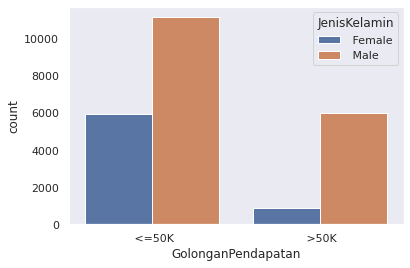

In [11]:
# Visualiasi diagram batang mengenai fitur jenis kelamin berdasarkan golongan pendapatan dari tabel dataset census_adult_income
sns.countplot(x='GolonganPendapatan',hue='JenisKelamin',data=data)

Keterangan Visualisasi Fitur jenis kelamnin berdasarkan golongan pendapatan :

Visualisasi diagram batang menunjukan mengenai hubungan jenis kelamin di masing-masing golongan pendapatan. Golongan Pendapatan <=50k lebih didominasi oleh laki-laki sekitar 10000+ karyawan, dimana perempuan sekitar 6000 karyawan atau setengah dari jumlah karyawan laki-laki, yang berarti untuk pendapatan <=50k paling sering didapatkan oleh laki-laki. Sedangkan Pendapatan >50k lebih didominasi oleh laki-laki sekitar 6000 karyawan, dimana perempuan sekitar 900+ karyawan atau jauh berbeda dari lak-laki, yang berarti untuk pendapatan >50k paling sering didapatkan oleh laki-laki. Tetapi Diagram Batang ini tidak bisa mempresentasikan perbandingan antar jenis kelamin berdasarkan pendapatan, karena seperti yang kita ketahui dalam dunis kerja, laki-laki lebih mendominasi semua sektor kelas kerja. Jadi Diagram ini hanya memberi informasi berdasarkan Golongan Pendapatan dari jenis kelamin dan tidak tepat untuk perbandingan.

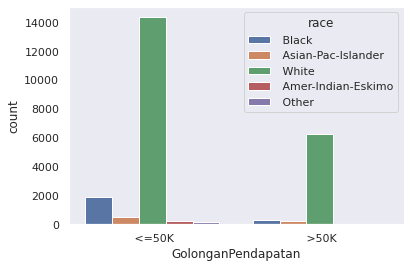

In [12]:
# Visualiasi diagram batang mengenai fitur race/ras etis berdasarkan golongan pendapatan dari tabel dataset census_adult_income
sns.countplot(x='GolonganPendapatan',hue='race',data=data)

Keterangan Visualisasi Fitur Ras etis berdasarkan golongan pendapatan :

Visualisasi diagram batang menunjukan mengenai hubungan ras etis di masing-masing golongan pendapatan. Golongan Pendapatan <=50k lebih didominasi oleh etis ras berkulit putih, dimana terdapat 14000 karyawan, yang berarti untuk pendapatan <=50k paling sering didominasi ras etis berkulit putih lalu di susul urutan kedua ras etis berkulit hitam. Sedangkan Pendapatan >50k juga lebih didominasi oleh etis ras berkulit putih, dimana perempuan sekitar 900+ karyawan atau jauh berbeda dari lak-laki, yang berarti untuk pendapatan >50k paling sering didominasi ras etis berkulit putih lalu di susul urutan kedua ras etis berkulit hitam dan urutan ketika Asian-Pac-Islander. Berdasarkan visualisasi bahwa masing ada ketidaksamaan ras atau toleransi di dalam dunia kerja mengenai para perkerja dengan ras etis tertentu. Problem ini akan lebih susah di atasi mengenai keseimbangan setiap ras etis pada golongan pendapatan, karena buka permasalahan dunia kerja tapi lebih permasalahna sosial.

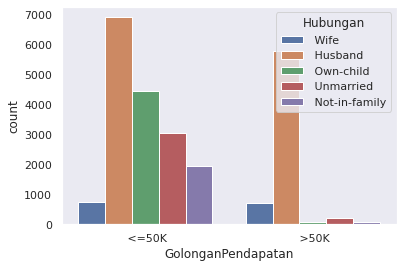

In [13]:
# Visualiasi diagram batang mengenai fitur hubungan berdasarkan golongan pendapatan dari tabel dataset census_adult_income
sns.countplot(x='GolonganPendapatan',hue='Hubungan',data=data)

Keterangan Visualisasi Fitur Hubungan berdasarkan golongan pendapatan :

Visualisasi diagram batang menunjukan mengenai hubungan status pernikahan para perkerja di masing-masing golongan pendapatan. Golongan Pendapatan <=50k lebih didominasi oleh karyawan yang berstatus hubungan berupa suami hampir berjumlah 6800 lebih dan urutan kedua dengan perkerja status hubungan sebagai istri. Sedangkan Pendapatan >50k juga lebih didominasi oleh karyawan yang berstatus hubungan berupa suami hampir berjumlah 5900 lebih dan urutan kedua dengan perkerja status hubungan sebagai istri. Berdasarkan visualisasi menujukkan memang dunia kerja lebih didominasi oleh laki-laki baik itu di golongan pendapatan <=50k dan >50k, yang secara alamiah merupakan tanggung jawab laki-laki untuk berkerja.

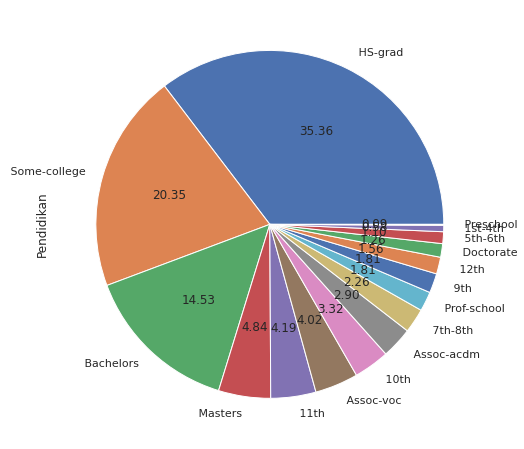

In [14]:
# Visualiasi diagram pie mengenai fitur pendidikan para perkerja dari tabel dataset census_adult_income
data['Pendidikan'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%.2f')

Keterangan Visualisasi Fitur Pendidikan :

Visualisasi diagram pie menunjukan mengenai riwayat pendidikan terakhir dari para perkerja sebelum memasuki dunia kerja. Berdasarkan visualisasi menujukkan para perkerja didominasi oleh lulusan HS-Grad/High School Graduation atau pendidikan terakhir para perkerja didominasi oleh lulusan SMA/Sekolah Menengah Atas. Urutan kedua para perkeja yang ada didunia kerja saat ini lulusan some-college atau beberapa perguruan dan untuk lulusan preschool atau belum enempuh pendidikan secara visualisasi pie hanya sedikit yang bisa berkerja. 

# 5 - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## a - Data Inference

Dikutip dari aws.amazon.com, Inferensi adalah proses membuat prediksi menggunakan model terlatih. Model inference adalah data yang tidak tersedia di dalam dataset, jika dicari datanya tidak ada, maka di masukkan data baru. Jadi model inference itu data baru yang tidak ada di data set. Data inference menggunakan dataset yang ada.

Dataset terbagi menjadi dua yaitu inference set dan Non inference set (Train set & Test set)

In [15]:
# Dapatkan Data untuk Inferensi Model

# Menggunakan pandas sampel dengan memangil 10 data random dan random_state digunakan agar random state yang terpilih tetap sama
datainfernce = data.sample(10, random_state=10) 
datainfernce #Diasumsikan terdapat 10 golongan pendapatan yang tidak ada di dalam dataset census_adult_income

,Usia,KelasKerja,Pendidikan,NomorPendidikan,StatusPernikahan,Perkerjaan,Hubungan,race,JenisKelamin,Keuntungan,Kerugian,JamPerMinggu,NegaraAsal,GolonganPendapatan
2316,24,Private,12th,8,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
21191,46,Federal-gov,Prof-school,15,Separated,Prof-specialty,Unmarried,White,Female,0,0,40,Germany,>50K
3589,36,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,1902,60,United-States,>50K
1893,48,Self-emp-inc,10th,6,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
14031,48,Private,Some-college,10,Married-civ-spouse,Sales,Husband,Black,Male,0,0,40,United-States,>50K
967,42,Private,Bachelors,13,Married-civ-spouse,Craft-repair,Wife,Black,Female,0,0,35,United-States,>50K
21146,37,Self-emp-inc,Assoc-acdm,12,Separated,Exec-managerial,Unmarried,White,Male,0,0,50,United-States,<=50K
5034,52,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,14,United-States,<=50K
16090,20,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K
16182,36,Private,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K


Dari sekumpulan informasi dari dataset catatan sensus penghasilan dewasa, terdapat 10 data yang diduga tidak masuk dalam kumpulan dataset atau tetapi terdapat di bagian data inference.

In [16]:
# Hapus Kumpulan Inferensi dari Kumpulan Data

data_train_test = data.drop(datainfernce.index)
data_train_test

,Usia,KelasKerja,Pendidikan,NomorPendidikan,StatusPernikahan,Perkerjaan,Hubungan,race,JenisKelamin,Keuntungan,Kerugian,JamPerMinggu,NegaraAsal,GolonganPendapatan
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23971,38,Private,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
23972,35,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
23973,31,Private,HS-grad,9,Separated,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
23974,48,Private,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,44,United-States,<=50K


In [17]:
data.shape

(23976, 14)

Ketika belum memisahkan data inference dari dataset bahwa, jumlah dataset awal sensus penghasilan dewasa memiliki 23976 baris kemudian menghilangkan/memisahkan data inference dari dataset sensus penghasilan dewasa berubah menjadi 23966 baris.

In [18]:
# Reset Index
# Agar tidak terjadi yang tidak diinginkan, data di reset index nya untuk keterurutan

data_train_test.reset_index(drop=True, inplace=True) #drop true menghapus index lama kemudian di bentuk ulang dari inplace=true
datainfernce.reset_index(drop=True, inplace=True)
datainfernce

,Usia,KelasKerja,Pendidikan,NomorPendidikan,StatusPernikahan,Perkerjaan,Hubungan,race,JenisKelamin,Keuntungan,Kerugian,JamPerMinggu,NegaraAsal,GolonganPendapatan
0,24,Private,12th,8,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
1,46,Federal-gov,Prof-school,15,Separated,Prof-specialty,Unmarried,White,Female,0,0,40,Germany,>50K
2,36,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,1902,60,United-States,>50K
3,48,Self-emp-inc,10th,6,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
4,48,Private,Some-college,10,Married-civ-spouse,Sales,Husband,Black,Male,0,0,40,United-States,>50K
5,42,Private,Bachelors,13,Married-civ-spouse,Craft-repair,Wife,Black,Female,0,0,35,United-States,>50K
6,37,Self-emp-inc,Assoc-acdm,12,Separated,Exec-managerial,Unmarried,White,Male,0,0,50,United-States,<=50K
7,52,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,14,United-States,<=50K
8,20,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K
9,36,Private,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K


Dibagian data inference indexnya tidak terurut karena menyesuaikan letak baris dari data yang tidak termasuk dataset sensus penghasilan dewasa, tetapi setelah di reset index jadi tersusun index nomornya. Dilakukan restart index, agar ketika dijalankan sampai bawah atau proses selesai jika ada keselahan hasil, sudah dipastikan bukan karena index nya berantakan atau tidak beraturan.

## b. - Splitting Dataset

Splitting Data merupakan pemisahan untuk membuat X sebagai fitur dan Y sebagai target menjadi Train/Test. Train/test split sebagai salah satu metode yang dapat digunakan untuk mengevaluasi performa model machine learning. 

In [19]:
# Pemisahan `X` (Fitur) dan `y` (Target)

X = data_train_test.drop('GolonganPendapatan', axis=1) #menghapus kolom axis=1 harga, untuk dimasukkan dan dibagi menjadi train/test
y = data_train_test['GolonganPendapatan']

In [20]:
# Split between Train-Set and Test-Set

# Memasukkan nilai x dan y, test_size artinya split 80% untuk train, dan 20% untuk test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (19172, 13)
Test Size :  (4794, 13)


Dilakukan proses penghapusan kolom golongan pendapatan untuk dialihkan sebagai training set dan testing set, dari data golongan pendapatan yang telah dialihkan lalu akan dilakukan proses tetrain_test_split dengan menjadi 80% golongan pendapatan masuk ke X_tarin dan 20% masuk ke y_train. X_train menggunakan 19172(80%) dari 23976 baris dan y_train menggunakan 4794 (sisa 20%) dari 23976 baris.

## c - Feature Selection

Dikutip dari trivusi.web.id, Feature selection atau seleksi fitur adalah teknik preprocessing dengan mengurangi jumlah fitur yang tidak relevan untuk menentukan kelas target.

Feature selectian bisa pake heat map, mencari nilai korelasi antara kolom fitur dengan kolom target setinggi mungkin atau serendah mungkin. Mencari korelasinya yang mendekati 1 kalau nilainya nol bisa di drop karena tidak ada korelasinya kolom fitur dengan kolom target. Target berkeinginan harus ada korelasinya.

### c1 - Feature Selection Kolom Numerik

Proses feature selection kolom numerik salah satunya bisa menggunakan metode random forest. Random forest melihat penggunaan pohon (tree) yang semakin banyak akan mempengaruhi akurasi yang akan didapatkan menjadi lebih baik.

In [21]:
#memanggil model
rf = RandomForestClassifier(n_estimators=100, random_state=39)
#melatih model
rf.fit(X_train[['Usia', 'NomorPendidikan']], y_train)
pred_train = rf.predict_proba(X_train[['Usia','NomorPendidikan']])
pred_test = rf.predict_proba(X_test[['Usia','NomorPendidikan']])

print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Random Forests roc-auc: 0.8375790003214653
Test set
Random Forests roc-auc: 0.7920761870588351


Sebelumnya saya telah mengamati berbagai kinerja fitur seperti usia, NomorPendidikan, Keuntungan, kerugian, JamPerminggu. Fitur Keuntungan dan kerugian menghasilkan Roc pada train set dan test set sangat rendah yaitu sekitar 0,209876 dan 0,131009. Fitur Usia, nomorpendidikan, jamperminggu menghasilkan Roc pada train set dan test set cukup underfit yaitu 0.910707 dan 0.778547. Fitur usia dan jamperminggu menghasilkan Roc pada train set dan test set cukup underfit yaitu 0.806666 dan 0.724682. Fitur Usia dan NomorPendidikan cukup unggul dibandingkan beberapa fitur lainnya, train set 0.837579 dan test set 0.792076, walaupun masih ada rentang nilainya tidak tetap, tetapi lebih dekat nilainya antara train dan set, bisa dikatakan goodfit. Bisa menjadi pertimbangan walaupun tidak terlalu baik. Niainya bagus untuk train.


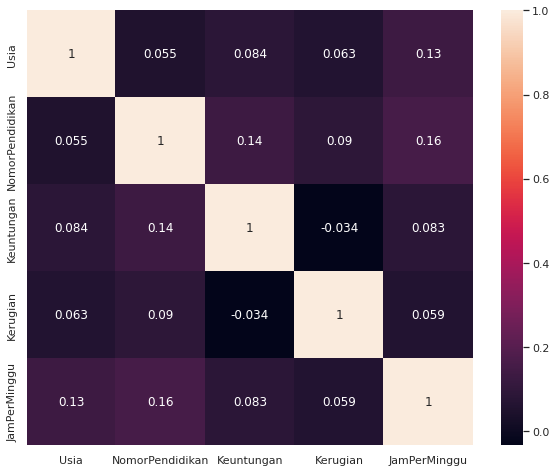

In [22]:
# Melihat Korelasi antara Fitur
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

Berdasarkan korelasi heat map, bisa melihat korelasi antara beberapa fitur. Fitur yang memiliki korelasi tinggi satu sama lain bisa di hapus atau tidak di gunakan, karena seharusnya fitur tidak saling mempengaruhi satu sama lain, tetapi harus mempengaruhi target. Berdasarkan nilai korelasi kolom usia dan nomor pendidikan cukup kecil nilainya satu sama lain, sehingga bisa di gunakan untuk fitur prediksi golongan pendapatan.

Feature Selection untuk training set dan testing set berupa data numerik, didasarkan oleh personal judgment yang saya tentukan : 
1. Fitur Usia, menjukkan bahwa semakin meningkat umur maka akan meningkatkan golongan pendapatan tenaga kerja. Ketika umur tenaga kerja semakin meningkat maka pengalaman dan skill semakin baik untuk kebutuhan lapagan perkerjaan. Ketika umur tenaga kerja semakin meningkat juga akan menyebabkan tenaga kerja itu sendiri lebih berusaha untuk mendapatkan golongan pendapatan yang lebih tinggi karena tanggung jawab dan kebutuhannya yang juga akan meningkat.
2. Fitur Nomor Pendidikan, Lama pendidikan yang ditempuh perkerja atau lamanya wajib belajar bisa mempangaruhi golongan pendapatan. Semakin lama pendidikan yang ditempuh, maka pengetahuan analisa dalam menyelesaikan permasalah di bidang kerja akan baik, sehingga berdasarkan skill pengetahuan tersebut bisa meningkatkan golongan pendapatan.

Berdasarkan personal judgment, RandomForestClassifier dan visualisasi heat map untuk data berupa numerik saya memilih kolom Usia dan Nomor Pendidikan.



### c2 - Feature Selection Kolom Kategorik

In [23]:
X_test

,Usia,KelasKerja,Pendidikan,NomorPendidikan,StatusPernikahan,Perkerjaan,Hubungan,race,JenisKelamin,Keuntungan,Kerugian,JamPerMinggu,NegaraAsal
2316,41,Private,1st-4th,2,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,Mexico
15787,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States
8692,43,Private,Bachelors,13,Married-civ-spouse,Machine-op-inspct,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States
16448,21,Private,Assoc-voc,11,Never-married,Transport-moving,Own-child,White,Male,0,0,40,United-States
9902,32,Local-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,65,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,53,Local-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States
5074,57,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
5382,64,Self-emp-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,2635,0,10,United-States
1211,36,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Other-service,Wife,White,Female,0,0,50,United-States


Berdasatkan personal judgment, saya hanya memilih beberapa fitur kategorik yang akan memprediksi nilai suatu target. Berikut beberapa fitur yang dipilih beserta alasannya :

1. Kelas kerja, tataran terrendah adalah bekerja sesuai penugasan. Apa yang diperintahkan dan menjadi kewajiban, jenis kelas kerja ini termasuk golongan yang gajinya rendah. Tataran tertinggi adalah seseorang yang memerintah orang lain dalam melakuka perkerjaan, jenis perkerjaan ini termasuk golongan gajinya tinggi. semakin rendah kelas kerja atau jabatan maka golongan gaji rendan begitu pula sebaliknya, semakin tinggi jabatan/posisi dalam suatu perkejaan maka golongan pendapatan juga tinggi.
2. Pendidikan, jenis pendidikan para perkerja mempangaruhi jumlah golongan kerja. Karena pendidikan yang cendrung lama, akan lebih memiliki tingkat pengetahuan yang lebih luas dalam menyelesaikan suatu permasalahan dalam dunia kerja. Mereka yang pendidikanya lebih lama, bisa memperoleh gologan pendapatan tinggi di bandingkan yang masa studinya hanya beberapa waktu saja.
3. Jenis Kelamin, para perkerja dewasa di lakukan oleh laki-laki dan perempuan. Perbedaan kedua jenis kelamin ini juga bisa mempengaruhi jenis golongan gaji yang di dapat. Para perkerja dengan resiko tinggi lebih memiliki pendapatan tinggi, dimana jenis perkejaan berbahaya ini cendrung dilakukan oleh laki-laki. Ada beberapa jenis perkejaan ringan menghasilkan pendapatan rendah, dimana golongan ini lebih cendrung dilakukan oleh perempuan.
4. Perkerjaan, merupakan profesi yang beranekaragam dilakukan oleh para perkerja demi memperoleh hak untuk memenuhi kebutuhan. Jenis perkerjaan pelayan buruh kasar cendrung memiliki gaji rendah di bandingkan para kontuktor yang cendrung memiliki gaji tinggi. Perkerjaan yang membutuhkan sumber daya manusia yang kritis cendrung memiliki golongan pendapatan tinggi.

Berdasarkan personal judgment, untuk data berupa kategorik saya memilih kolom kelas kerja, Pendidikan, Jenis Kelamin dan Perkerjaan.

In [24]:
X_train.drop(['StatusPernikahan', 'Hubungan', 'race', 'Keuntungan','Kerugian','JamPerMinggu','NegaraAsal'], axis=1, inplace=True)
X_test.drop(['StatusPernikahan', 'Hubungan', 'race', 'Keuntungan','Kerugian','JamPerMinggu','NegaraAsal'], axis=1, inplace=True)

## d - Handling Missing Value

Dikutip dari file.upi.edu.com, Missing value adalah informasi yang tidak tersedia untuk sebuah objek (kasus). Missing value terjadi karena informasi untuk sesuatu tentang objek tidak diberikan, sulit dicari, atau memang informasi tersebut tidak ada. Pada proses ini akan dilakukan pengecekan data missing value dengan .info() terlebih dahulu :

In [25]:
# Mengecek Missing Values on X_train
X_train.isnull().sum()

Usia               0
KelasKerja         0
Pendidikan         0
NomorPendidikan    0
Perkerjaan         0
JenisKelamin       0
dtype: int64

In [26]:
# Mengecek Missing Values on X_train
X_test.isnull().sum()

Usia               0
KelasKerja         0
Pendidikan         0
NomorPendidikan    0
Perkerjaan         0
JenisKelamin       0
dtype: int64

In [27]:
# Mengecek Missing Values on X_train
y_train.isnull().sum()

0

In [28]:
# Mengecek Missing Values on X_train
y_test.isnull().sum()

0

Setelah di lakukan proses handling missing value maka variabel X_train, X_test, y_train dan y_test bahwa tidak terdapat missing value yang artinya sudah bersih dari Nan data. Selanjutnya akan dilakukan handling outlier.

## e - Handling Outlier

Dikutik dari statistika.com, Data Outlier disebut juga dengan data pencilan. Pengertian dari Outlier adalah data observasi yang muncul dengan nilai-nilai ekstrim, baik secara univariat ataupun multivariat. Yang dimaksud dengan nilai-nilai ekstrim dalam observasi adalah nilai yang jauh atau beda sama sekali dengan sebagian besar nilai lain dalam kelompoknya.

Untuk mengatasi nilai outlier, saya memilih metode Censoring. Censoring atau capping, berfungsi untuk membatasi distribusi maksimum atau minimum pada nilai yang berubah-ubah. Pengubahan skala agar masuk ke dalam boxplot. Saya tidak memilih metode Trimming atau penghapusan, agar dimensi ukuran metriks nya tetap sama dan jumlah data masih terjaga.

In [29]:
# Berfungsi untuk membuat histogram dan boxplot.
# Fungsi ini menggunakan kerangka data census_adult_income dan variabel yang diinginkan sebagai argumen.

def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

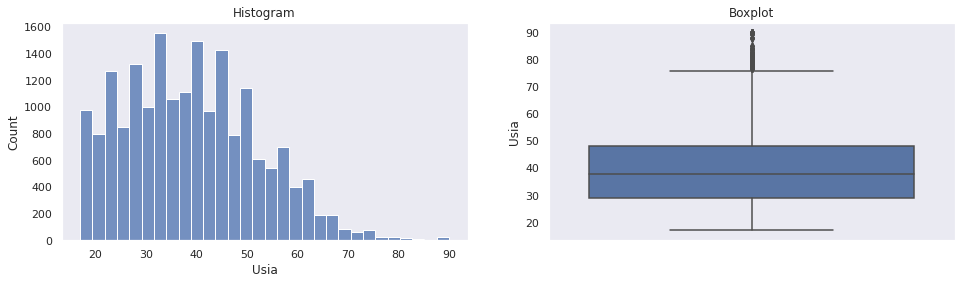


Skewness Value Stempel Usia:  0.4427645659448939


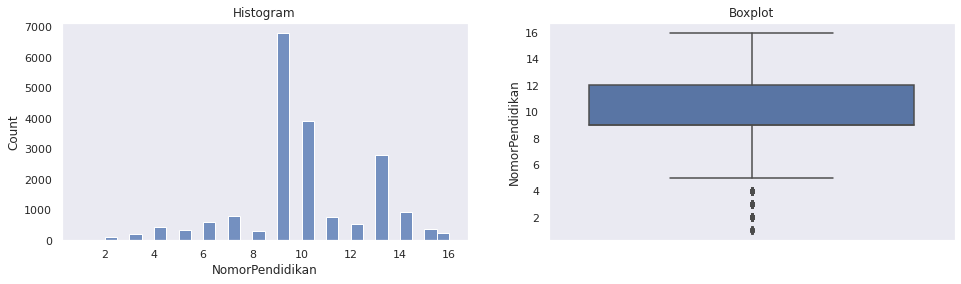


Skewness Value NomorPendidikan:  -0.21658382502838006


In [30]:
# Mengecek Distribusi fitur dan outlier menggunakan Boxplot

diagnostic_plots(X_train, 'Usia')
print('\nSkewness Value Stempel Usia: ', X_train['Usia'].skew())

diagnostic_plots(X_train, 'NomorPendidikan')
print('\nSkewness Value NomorPendidikan: ', X_train['NomorPendidikan'].skew())

Dikatakan berdistribusi normal ketika nilai rasio skewness berada pada rentang nilai -2 sampai 2. Tiga Fitur berupa Usia, Nomor Pendidikan dan JamPerMinggu semua atanya berdistribusi normal karena memiliki nilai skewness yang sesuai standarnya. Tetapi berdarkan visualisasi boxplot fitur Usia terdapat outlier di bagian upper boxplot/bagian atas boxplot dan fitur Nomor Pendidikan terdapat outlier di bagian lower boxplot/bagian bawah boxplotOleh karena itu akan di cari terlebih dahulu nilai IQR untuk menyamakan range nilainya agar masuk ke dalam boxplot. 

In [31]:
# Menghitung/menentukan nilai IQR untuk data numerik
X_train_ = Winsorizer(capping_method='iqr', # pilih iqr untuk batas aturan IQR atau gaussian untuk mean dan std
                          tail='both',
                          fold=1.5,
                          variables=['Usia','NomorPendidikan'])
X_train_.fit(X_train)
X_train_clear = X_train_.transform(X_train) #setelah di fit lalu di transform agar outliernya tersensor/sama dilingkup boxplot

In [32]:
# Pemeriksaan perbandingan data outlier sebelum dan sesudah
# Periksa batas minimum untuk setiap variabel
print('Left Tail Caps  : ', X_train_.left_tail_caps_)
print('           ')
# Periksa batas maksimum untuk setiap variabel
print('Right Tail Caps : ', X_train_.right_tail_caps_)

Left Tail Caps  :  {'Usia': 0.5, 'NomorPendidikan': 4.5}
           
Right Tail Caps :  {'Usia': 76.5, 'NomorPendidikan': 16.5}



Usia - Setelah Handling Outlier Capping

Skewness Value Usia:  0.4427645659448939


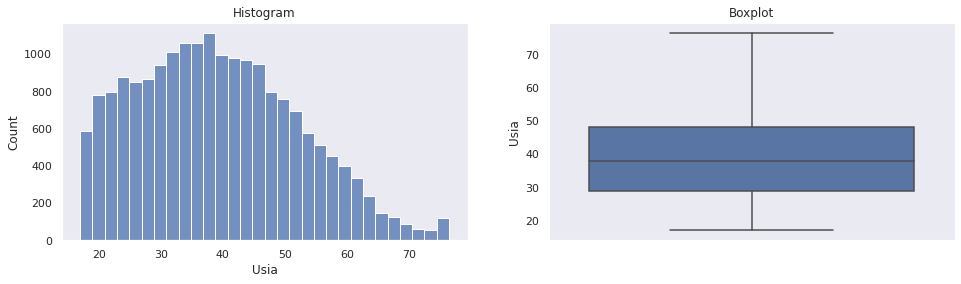


Nomor Pendidikan - Setelah Handling Outlier Capping

Skewness Value Nomor Pendidikan:  -0.21658382502838006


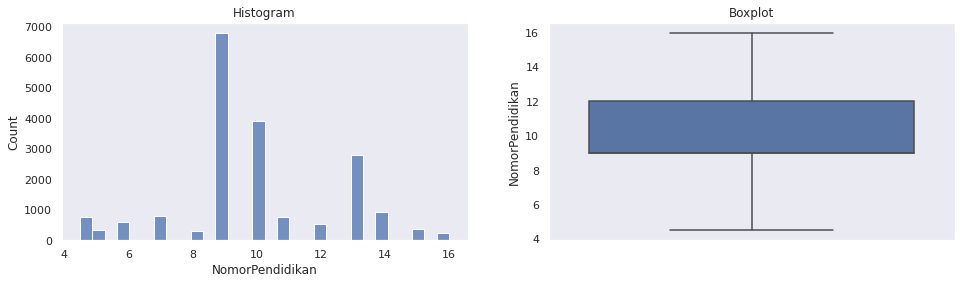

In [33]:
# Visualisasi Setelah Handling Outlier

print('\nUsia - Setelah Handling Outlier Capping')
print('\nSkewness Value Usia: ', X_train['Usia'].skew())
diagnostic_plots(X_train_clear, 'Usia')

print('\nNomor Pendidikan - Setelah Handling Outlier Capping')
print('\nSkewness Value Nomor Pendidikan: ', X_train['NomorPendidikan'].skew())
diagnostic_plots(X_train_clear, 'NomorPendidikan')

Visualisasi histogram untuk distribusi normal dan boxplot identifikasi data oulier, berdasarkan gambar di atas bahwa fitur usia, nomor pendidikan dan jamperminggu tetap berdistribusi normal seperti sebelumnya. Dikatakan berdistribusi normal ketika nilai rasio skewness berada pada rentang nilai -2 sampai 2, dimana fitur usia, nomor pendidikan dan jamperminggu memiliki nilai skewness sesuai standar penentuan. Untuk Data oulier sudah tidak ada lagi, karena semua data yang menjauh dari pusar rata-rata sampel telah di sensoring semuanya. Sehingga sudah tidak ada lagi data outlier.

In [34]:
# DIPEROLEH X_train YANG SUDAH DI LAKUKAN DATA CLEANING/FEATURE ENGINEERING
# Variabel X_train_clear sudah bersih dari Missing Value dan Outlier
X_train_clear

,Usia,KelasKerja,Pendidikan,NomorPendidikan,Perkerjaan,JenisKelamin
15574,24.0,Private,HS-grad,9.0,Transport-moving,Male
13128,58.0,Private,Some-college,10.0,Tech-support,Male
8616,34.0,Private,Bachelors,13.0,Farming-fishing,Male
16625,42.0,Private,Bachelors,13.0,Tech-support,Female
7065,53.0,Private,Masters,14.0,Sales,Male
...,...,...,...,...,...,...
9372,59.0,Private,Bachelors,13.0,Exec-managerial,Male
7291,64.0,Private,Masters,14.0,Exec-managerial,Male
17728,22.0,Private,Some-college,10.0,Adm-clerical,Male
7293,38.0,Local-gov,Masters,14.0,Prof-specialty,Male


Sehingga di peroleh variabel X_train_clear yang bersih dari missing value dan outlier. Untuk variabel X_test sudah besih dari missing value dan oulier nya tidka perlu dilakukan.

## f - Memisahkan Kolom Numerik dan Kolom Kategorik

Dikutip dari idikuu.com, Data numerik adalah data yang dapat diukur, kemudian data tersebut dapat kita olah sedemikian rupa seperti diurutkan, dicari rata-rata, paling banyak muncul dan lain sebagainya. Sedangkan Data kategorik adalah jenis data yang terdiri dari variabel atau data dari hasil pengelompokkan berdasarkan kategori yang telah ditentukan. Berdasarkan definisi kedua jenis data tersebut, bahwa terdapat perbedaan karakterstik data pada masing-masing fitur, oleh karena itu harus dilakukan pemisahan.

In [35]:
# Dapatkan Variabel Baru Kolom Numerik dan Kolom Kategorik

KolomNumerik = X_train_clear.select_dtypes(include=np.number).columns.tolist()
KolomKategorik = X_train_clear.select_dtypes(include=['object']).columns.tolist()

print('Kolom Numerik dari dataset rideshare : ', KolomNumerik)
print('------------------------------------------------------------------------------------------------')
print('Kolom Kategorik dari dataset rideshare : ', KolomKategorik)

Kolom Numerik dari dataset rideshare :  ['Usia', 'NomorPendidikan']
------------------------------------------------------------------------------------------------
Kolom Kategorik dari dataset rideshare :  ['KelasKerja', 'Pendidikan', 'Perkerjaan', 'JenisKelamin']


In [36]:
# buat variabel x_train untuk numerik/kategorik dan buat variabel x_train untuk numerik/kategorik

X_train_num = X_train_clear[KolomNumerik]
X_train_cat = X_train_clear[KolomKategorik]

X_test_num = X_test[KolomNumerik]
X_test_cat = X_test[KolomKategorik]

Dilakukan proses pemisahan sesuai jenis data dari masing-masing fitur, misalnya X_train di bagi menjadi 2 bagian sesuai data kategorik dan data numerik. serta X_test di bagi menjadi 2 bagian sesuai data karegorik dan data numerik. Tujuan pemisahan berdasarkan jenis data, agar lebih mudah untuk penyamaan skala pada seluruh fitur. 

## g - Feature Scaling

Dikutip dari medium.com, Feature Scaling adalah suatu cara untuk membuat numerical data pada dataset memiliki rentang nilai (scale) yang sama. Tidak ada lagi satu variabel data yang mendominasi variabel data lainnya.

In [37]:
# Menampilkan X_train_num 
X_train_num 

,Usia,NomorPendidikan
15574,24.0,9.0
13128,58.0,10.0
8616,34.0,13.0
16625,42.0,13.0
7065,53.0,14.0
...,...,...
9372,59.0,13.0
7291,64.0,14.0
17728,22.0,10.0
7293,38.0,14.0


In [38]:
# Menampilkan X_train_cat
X_test_num 

,Usia,NomorPendidikan
2316,41,2
15787,22,9
8692,43,13
16448,21,11
9902,32,13
...,...,...
974,53,13
5074,57,9
5382,64,9
1211,36,10


x_train_num harus di scaling , agar tidak melihat data kolom dengan nilai paling besar saja. semua besaran indeks dari puluhan, ratusan dan jutaanya menjadi setara.

In [39]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler() # Nilainya di ubah skalanya menjadi 0 sampai 1
scaler.fit(X_train_num) # .fit itu proses tranning untuk mencari kolom yang akan di ubah scaler nya, .fit hanya di gunakan untuk X_train dan tidak untuk X_test
# fit itu proses pencarian batas 0 dan batas 1 

X_train_num_scaled = scaler.transform(X_train_num) #setelah di lakukan scaler baru di transform/mengubah nilainya menjadi 0 sampai 1
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.11764706, 0.39130435],
       [0.68907563, 0.47826087],
       [0.28571429, 0.73913043],
       ...,
       [0.08403361, 0.47826087],
       [0.35294118, 0.82608696],
       [0.06722689, 0.47826087]])

In [40]:
X_test_num_scaled

array([[ 0.40336134, -0.2173913 ],
       [ 0.08403361,  0.39130435],
       [ 0.43697479,  0.73913043],
       ...,
       [ 0.78991597,  0.39130435],
       [ 0.31932773,  0.47826087],
       [ 0.92436975,  0.13043478]])

X_train dan X_test semua fitr telah di scaling, yang artinya sudah memiliki skala atau range yang sama antara fitur. dimana masing-masing fitur di hituung berdasarkal ukuran skalanya. Hasil range dari proses scaling ini antara 0 sampai 1.

## h -  Feature Encoding

Feature encoding proses pengubahan suatu data berupa kategorik yang akan diubah menjadi bentuknya menjadi numerik/angka, karena dalam meachine learning tidak bisa memproses suatu string . Jadi harus di ubah ke angka, salah satu caranya orginaencoding.

In [41]:
# Menampilkan X_train_cat 
X_train_cat

,KelasKerja,Pendidikan,Perkerjaan,JenisKelamin
15574,Private,HS-grad,Transport-moving,Male
13128,Private,Some-college,Tech-support,Male
8616,Private,Bachelors,Farming-fishing,Male
16625,Private,Bachelors,Tech-support,Female
7065,Private,Masters,Sales,Male
...,...,...,...,...
9372,Private,Bachelors,Exec-managerial,Male
7291,Private,Masters,Exec-managerial,Male
17728,Private,Some-college,Adm-clerical,Male
7293,Local-gov,Masters,Prof-specialty,Male


In [42]:
# Menampilkan X_train_cat 
X_test_cat

,KelasKerja,Pendidikan,Perkerjaan,JenisKelamin
2316,Private,1st-4th,Craft-repair,Male
15787,Private,HS-grad,Adm-clerical,Male
8692,Private,Bachelors,Machine-op-inspct,Male
16448,Private,Assoc-voc,Transport-moving,Male
9902,Local-gov,Bachelors,Prof-specialty,Male
...,...,...,...,...
974,Local-gov,Bachelors,Prof-specialty,Female
5074,Self-emp-inc,HS-grad,Exec-managerial,Male
5382,Self-emp-inc,HS-grad,Craft-repair,Male
1211,Self-emp-not-inc,Some-college,Other-service,Female


KelasKerja	Pendidikan	StatusPernikahan	Perkerjaan	Hubungan	race	JenisKelamin	NegaraAsal

In [43]:
# Mari kita periksa kardinalitas, ini adalah jumlah label yang berbeda, untuk variabel kategori yang berbeda
print('---------------------------------- KATEGORIK X_TRAIN ------------------------------------')
print('Number of categories in the variable KelasKerja        : {}'.format(len(X_train_cat.KelasKerja.unique())))
print('Number of categories in the variable Pendidikan        : {}'.format(len(X_train_cat.Pendidikan.unique())))
print('Number of categories in the variable Perkerjaan        : {}'.format(len(X_train_cat.Perkerjaan.unique())))
print('Number of categories in the variable Jenis Kelamin     : {}'.format(len(X_train_cat.JenisKelamin.unique())))
print('             ')
print('---------------------------------- KATEGORIK X_TEST ------------------------------------')
# Mari kita periksa kardinalitas, ini adalah jumlah label yang berbeda, untuk variabel kategori yang berbeda
print('Number of categories in the variable KelasKerja        : {}'.format(len(X_test_cat.KelasKerja.unique())))
print('Number of categories in the variable Pendidikan        : {}'.format(len(X_test_cat.Pendidikan.unique())))
print('Number of categories in the variable Perkerjaan        : {}'.format(len(X_test_cat.Perkerjaan.unique())))
print('Number of categories in the variable Jenis Kelamin     : {}'.format(len(X_test_cat.JenisKelamin.unique())))

---------------------------------- KATEGORIK X_TRAIN ------------------------------------
Number of categories in the variable KelasKerja        : 8
Number of categories in the variable Pendidikan        : 16
Number of categories in the variable Perkerjaan        : 15
Number of categories in the variable Jenis Kelamin     : 2
             
---------------------------------- KATEGORIK X_TEST ------------------------------------
Number of categories in the variable KelasKerja        : 8
Number of categories in the variable Pendidikan        : 16
Number of categories in the variable Perkerjaan        : 14
Number of categories in the variable Jenis Kelamin     : 2


In [44]:
encoder = OneHotEncoder()
encoder.fit(X_train_cat)
X_train_Cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_Cat_encoded = encoder.transform(X_test_cat).toarray()
X_train_Cat_encoded

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.]])

Kolom kategorik dengan berebagai jenis unique berbagai ragam telah diubah menjadi bentuknya menjadi numerik/angka, angka dalan encoding disesuikan oleh unique dalam kolom fitur tersebur, rentang nilainya dari 0 sampai 1.

## i - Menggabungkan Kolom numerik dan Kolom kategorik

Kolom numerik dan kolom kategorik yang skala nya sudah sama semua, akan di gabungkan menjadi X_train_final dan X_test_final.

In [45]:
# mengabungkan kolom numerik dengan kolom kategorical

X_train_final = np.concatenate([X_train_num_scaled, X_train_Cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_Cat_encoded], axis=1)
X_train_final

array([[0.11764706, 0.39130435, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.68907563, 0.47826087, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.28571429, 0.73913043, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.08403361, 0.47826087, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.35294118, 0.82608696, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.06722689, 0.47826087, 0.        , ..., 1.        , 0.        ,
        1.        ]])

Data X_train dan X_test yang sebelumnya di pisah berdasarkan jenis data kategorik dan numerik, telah memiliki range nilai yang sama, maka akan digabungkan kembali menjadi tabel dataset sensus penghasilan dewasa.

In [46]:
# Untuk Y Train Logistic
encoder1 = LabelEncoder()
encoder1.fit(y_train)
y_train_encoded = encoder1.transform(y_train)
y_test_encoded = encoder1.transform(y_test)
y_train_encoded

array([0, 0, 1, ..., 0, 1, 0])

Pembentukan model hanya bisa dilakukan untuk data numerik, karena target y_test dan y_train merupakan data kategorik, maka akan dilakukan pengubahan nilainya menggunakan labenencoder.

# 6 - Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## 6a - Logistic Regression

In [47]:
# Training using Linear Regression
# Algoritma yang akan di gunakan untuk memproses data adalah linear regression
model_log_reg =  LogisticRegression()

Model definition yang saya gunakan adalah Logistic regression, karena metode ini salah satu jenis analisis statistik yang digunakan untuk pemodelan prediktif. Dalam pendekatan model ini, nilai targetnya terbatas atau kategoris, bisa berupa A atau B (regresi biner). Target pada tabel census penghasilan dewasa, berupa binear yaitu <=50k dan >50k, oleh karena itu digunakan model logistic regression.

## 6b - SVM

In [48]:
# Model SVM untuk kernel RBF dengan parameter C=1, derajat=3 dan koefisien=1
model_svm=SVC(kernel='rbf',C=1,degree=3,coef0=1)

In [49]:
# Model SVM untuk kernel RBF dengan parameter C=1, derajat=2 dan koefisien=1
model_svm1=SVC(kernel='rbf',C=1,degree=2,coef0=1)

Model definition yang saya gunakan adaah Support Vector Machine (SVM), karena metode ini salah satu algoritma machine learning dengan pendekatan supervised learning yang bekerja dengan mencari hyperplane atau fungsi pemisah terbaik untuk memisahkan kelas. Algoritma ini dapat digunakan untuk klasifikasi (SVM classification) dan regresi (SVM regression). Pada kasus dataset sensus penghasilan dewasa, akan digunakan SVM klasifikasi untuk memisahkan antara kelas pendapatan <=50k dengan kelas pendapatan >50k.

Pada pencarian modell SVM saya menggunakan kernel Rbf, Kelebihan menggunakan kernel RBF dibandingkan linear dana polynomial adalah dapat memisahkan data lebih akurat karena data akan masuk kedalam dimensi baru sehingga kita dapat memberikan batas untuk menentukan hyperplane menggunakan parameter C=1, membandingkan degree 2 dan 3, serta koefisien nya 0. Parameter C=1 memberi optimasi SVM seberapa banyak ingin menghindari kesalahan klasifikasi, dimana c = 1, membuat suport vektor memisah selebar mungkin memisahkan antar kategori. Penentuan parameter degree sebagai pemisah rentang kernal dengan 2 atau 3. Penentuan parameter coefisien untuk melihat signifikan hubungan korelasi mempengaruhi fitur dengan memasukkan angka umum parameternya 1.

# 7 - Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## 7a - Model Training Logistic Regression

In [50]:
# Train the Model

model_log_reg.fit(X_train_final, y_train_encoded)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Model training sebagai bentuk kerja algoritma untuk mencapai pemodelan yang terbaik. Model logistik regresi membandingkan seluruh fitur dengan y taget untuk memperoleh prediksi.

## 7b - Model Training SVM

In [51]:
# Train Model untuk kernel RBF dengan parameter C=1, derajat=3 dan koefisien=1
model_svm.fit(X_train_final, y_train_encoded)

SVC(C=1, coef0=1)

In [52]:
# Train Model untuk kernel RBF dengan parameter C=1, derajat=2 dan koefisien=1
model_svm1.fit(X_train_final, y_train_encoded)

SVC(C=1, coef0=1, degree=2)

Model training sebagai bentuk kerja algoritma untuk mencapai pemodelan yang terbaik. Model SVM kategorik membandingkan seluruh fitur dengan y taget untuk memperoleh prediksi.

# 8 - Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

## 8a - Model Evaluation Logistic Regression

In [53]:
y_pred_train = model_log_reg.predict(X_train_final)
y_pred_test = model_log_reg.predict(X_test_final)

In [54]:
print('accuracy score train : ',accuracy_score(y_train_encoded,y_pred_train))
print('accuracy score test : ',accuracy_score(y_test_encoded,y_pred_test))

accuracy score train :  0.7937095764656791
accuracy score test :  0.7884856070087609


Ketepatan model accuracy score train sebesar 79,37% dan accuracy score test sebesar 78,84%. Hal ini menunjukkan bahwa model Logistic Regression cukup baik atau goodfit, yang berarti bahwa model tersebut melakukan pekerjaan yang baik dalam memprediksi hasil golongan pendapatan pada kumpulan data fitur usia, kelas kerja, nomor pendidikan, pendidikan, perkerjaan dan jenis kelamin yang telah dilatih.

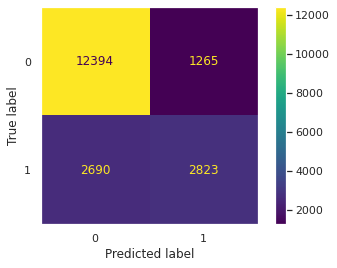

In [55]:
cm = confusion_matrix(y_train_encoded, y_pred_train, labels=model_log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_log_reg.classes_)

disp.plot()
plt.show()

Confusion Matrix X_train. Nilai 12394 adalah banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >=50k dan kenyataan pada data observasi sesungguhnya golongan pendapatan tersebut merupakan kategori benar. Nilai 1265 adalah banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >=50k tapi kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori salah tetapi terdeteksi benar. Nilai 2690 adalah banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >50k tapi kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori benar tetapi terdeteksi salah. Nilai 2823 adalah banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >50k dan kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori benar salah.  

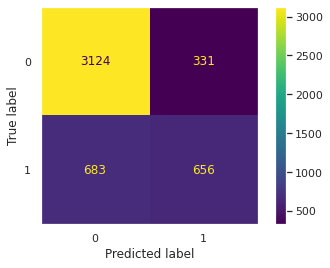

In [56]:
cm = confusion_matrix(y_test_encoded, y_pred_test, labels=model_log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_log_reg.classes_)

disp.plot()
plt.show()

Confusion Matrix X_test. Nilai 3124 adalah banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >=50k dan kenyataan pada data observasi sesungguhnya golongan pendapatan tersebut merupakan kategori benar. Nilai 331 adalah banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >=50k tapi kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori salah tetapi terdeteksi benar. Nilai 683 adalah banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >50k tapi kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori benar tetapi terdeteksi salah. Nilai 656 adalah banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >50k dan kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori benar salah.  

In [57]:
print(classification_report(y_train_encoded,y_pred_train))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86     13659
           1       0.69      0.51      0.59      5513

    accuracy                           0.79     19172
   macro avg       0.76      0.71      0.73     19172
weighted avg       0.78      0.79      0.78     19172



Classification report y_train. Precision >=50k dari perbandingan antara golongan pendapatan yang masuk memang benar dengan banyaknya data yang diprediksi positif atau diduga benar sebesar 0,82. Recall >=50k dari perbandingan antara gologan pendapatan yang masuk memang benar dengan banyaknya data yang sebenarnya positif atau sesuai dengan data sebesar 0,91. Precision >50k dari perbandingan antara golongan pendapatan yang masuk memang benar dengan banyaknya data yang diprediksi positif atau diduga benar sebesar 0,69. Recall >50k dari perbandingan antara gologan pendapatan yang masuk memang benar dengan banyaknya data yang sebenarnya positif atau sesuai dengan data sebesar 0,51.

In [58]:
print(classification_report(y_test_encoded,y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      3455
           1       0.66      0.49      0.56      1339

    accuracy                           0.79      4794
   macro avg       0.74      0.70      0.71      4794
weighted avg       0.78      0.79      0.78      4794



Classification report y_test. Precision >=50k dari perbandingan antara golongan pendapatan yang masuk memang benar dengan banyaknya data yang diprediksi positif atau diduga benar sebesar 0,82. Recall >=50k dari perbandingan antara gologan pendapatan yang masuk memang benar dengan banyaknya data yang sebenarnya positif atau sesuai dengan data sebesar 0,90. Precision >50k dari perbandingan antara golongan pendapatan yang masuk memang benar dengan banyaknya data yang diprediksi positif atau diduga benar sebesar 0,66. Recall >50k dari perbandingan antara gologan pendapatan yang masuk memang benar dengan banyaknya data yang sebenarnya positif atau sesuai dengan data sebesar 0,49.

## 8b - Model Evaluation SVM

In [59]:
# Model Evaluation untuk kernel RBF dengan parameter C=1, derajat=3 dan koefisien=1
y_pred_train_svm=model_svm.predict(X_train_final)
y_pred_test_svm=model_svm.predict(X_test_final)

print('accuracy score train : ',accuracy_score(y_train_encoded,y_pred_train_svm))
print('accuracy score test : ',accuracy_score(y_test_encoded,y_pred_test_svm))

accuracy score train :  0.7970999374087211
accuracy score test :  0.7836879432624113


Sebelumnya saya telah melakukan perbandingan model SVM dengan degree 2 dan degree 3, diperoleh bahwa nilai degree 3 lebih baik dari degree 2 yang nilai X_train dan x_test nya memiliki selesih jarak lebih jauh dibandingkan degree 3 yang hanya memilihi selisih 0,134 lebih dekat.
Ketepatan accuracy score Model SVM untuk kernel RBF dengan parameter C=1, derajat=3 dan koefisien=1 train set sebesar 79,70% dan accuracy score test sebesar 78,36%. Hal ini menunjukkan bahwa model SVM cukup baik atau goodfit, yang berarti bahwa model tersebut melakukan pekerjaan yang baik dalam memprediksi hasil golongan pendapatan pada kumpulan data fitur usia, kelas kerja, nomor pendidikan, pendidikan, perkerjaan dan jenis kelamin yang telah dilatih.

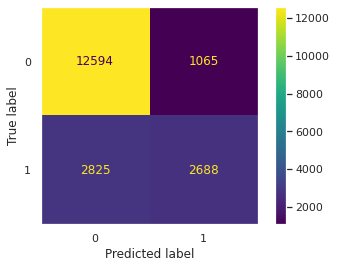

In [60]:
sm = confusion_matrix(y_train_encoded, y_pred_train_svm, labels=model_svm.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=sm,display_labels=model_svm.classes_)
disp_svm.plot()
plt.show()

Confusion Matrix X_train. Nilai 12594 adalah banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >=50k dan kenyataan pada data observasi sesungguhnya golongan pendapatan tersebut merupakan kategori benar. Nilai 1065 adalah banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >=50k tapi kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori salah tetapi terdeteksi benar. Nilai 2825 adalah banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >50k tapi kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori benar tetapi terdeteksi salah. Nilai 2688 adalah banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >50k dan kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori benar salah.

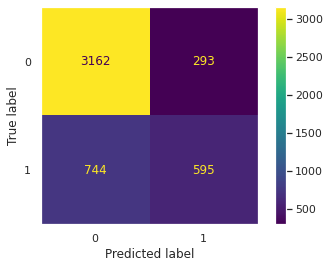

In [61]:
sm = confusion_matrix(y_test_encoded, y_pred_test_svm, labels=model_svm.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=sm,display_labels=model_svm.classes_)
disp_svm.plot()
plt.show()

Confusion Matrix X_test. Nilai 3162 adalah banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >=50k dan kenyataan pada data observasi sesungguhnya golongan pendapatan tersebut merupakan kategori benar. Nilai 293 adalah banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >=50k tapi kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori salah tetapi terdeteksi benar. Nilai 744 adalah banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >50k tapi kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori benar tetapi terdeteksi salah. Nilai 595 adalah banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >50k dan kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori benar salah.

In [62]:
print(classification_report(y_train_encoded, y_pred_train_svm))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87     13659
           1       0.72      0.49      0.58      5513

    accuracy                           0.80     19172
   macro avg       0.77      0.70      0.72     19172
weighted avg       0.79      0.80      0.78     19172



Classification report y_train. Precision >=50k dari perbandingan antara golongan pendapatan yang masuk memang benar dengan banyaknya data yang diprediksi positif atau diduga benar sebesar 0,82. Recall >=50k dari perbandingan antara gologan pendapatan yang masuk memang benar dengan banyaknya data yang sebenarnya positif atau sesuai dengan data sebesar 0,92. Precision >50k dari perbandingan antara golongan pendapatan yang masuk memang benar dengan banyaknya data yang diprediksi positif atau diduga benar sebesar 0,72. Recall >50k dari perbandingan antara gologan pendapatan yang masuk memang benar dengan banyaknya data yang sebenarnya positif atau sesuai dengan data sebesar 0,49.

In [63]:
print(classification_report(y_test_encoded, y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3455
           1       0.67      0.44      0.53      1339

    accuracy                           0.78      4794
   macro avg       0.74      0.68      0.70      4794
weighted avg       0.77      0.78      0.77      4794



Classification report y_test. Precision >=50k dari perbandingan antara golongan pendapatan yang masuk memang benar dengan banyaknya data yang diprediksi positif atau diduga benar sebesar 0,81. Recall >=50k dari perbandingan antara gologan pendapatan yang masuk memang benar dengan banyaknya data yang sebenarnya positif atau sesuai dengan data sebesar 0,92. Precision >50k dari perbandingan antara golongan pendapatan yang masuk memang benar dengan banyaknya data yang diprediksi positif atau diduga benar sebesar 0,67. Recall >50k dari perbandingan antara gologan pendapatan yang masuk memang benar dengan banyaknya data yang sebenarnya positif atau sesuai dengan data sebesar 0,44.

# 9 - Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [64]:
# Save the Files

import joblib
import json

with open('model_log_reg.pkl', 'wb') as file_1:
  joblib.dump(model_log_reg, file_1) 

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2) 

with open('model_encoder.pkl', 'wb') as file_3:
  joblib.dump(encoder, file_3)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(KolomNumerik, file_4)

with open('list_cat_cols.txt', 'w') as file_5:
  json.dump(KolomKategorik, file_5) 

## a - Load Model

In [65]:
# Load All Files
import joblib
import json

with open('model_log_reg.pkl', 'rb') as file_1:
  model_log_reg = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = joblib.load(file_2)

with open('model_encoder.pkl', 'rb') as file_3:
  model_encoder = joblib.load(file_3)

with open('list_num_cols.txt', 'r') as file_4:
  list_num_cols = json.load(file_4)

with open('list_cat_cols.txt', 'r') as file_5:
  list_cat_cols = json.load(file_5)

## b - Loading Data Inference

In [66]:
# Sebelum inference kita tampilkan dulu data inference yang di awal
datainfernce

,Usia,KelasKerja,Pendidikan,NomorPendidikan,StatusPernikahan,Perkerjaan,Hubungan,race,JenisKelamin,Keuntungan,Kerugian,JamPerMinggu,NegaraAsal,GolonganPendapatan
0,24,Private,12th,8,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
1,46,Federal-gov,Prof-school,15,Separated,Prof-specialty,Unmarried,White,Female,0,0,40,Germany,>50K
2,36,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,1902,60,United-States,>50K
3,48,Self-emp-inc,10th,6,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
4,48,Private,Some-college,10,Married-civ-spouse,Sales,Husband,Black,Male,0,0,40,United-States,>50K
5,42,Private,Bachelors,13,Married-civ-spouse,Craft-repair,Wife,Black,Female,0,0,35,United-States,>50K
6,37,Self-emp-inc,Assoc-acdm,12,Separated,Exec-managerial,Unmarried,White,Male,0,0,50,United-States,<=50K
7,52,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,14,United-States,<=50K
8,20,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K
9,36,Private,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K


## c - Feature Scaling Data Inference

In [73]:
# memisahkan columns numerikal dan kategorikal data_inference

data_inf_num = datainfernce[list_num_cols]
data_inf_cat = datainfernce[list_cat_cols]

In [74]:
data_inf_num

,Usia,NomorPendidikan
0,24,8
1,46,15
2,36,9
3,48,6
4,48,10
5,42,13
6,37,12
7,52,9
8,20,9
9,36,9


In [69]:
data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_num_scaled

array([[0.11764706, 0.30434783],
       [0.48739496, 0.91304348],
       [0.31932773, 0.39130435],
       [0.5210084 , 0.13043478],
       [0.5210084 , 0.47826087],
       [0.42016807, 0.73913043],
       [0.33613445, 0.65217391],
       [0.58823529, 0.39130435],
       [0.05042017, 0.39130435],
       [0.31932773, 0.39130435]])

## d - Feature Encoding Data Inference

In [75]:
data_inf_cat

,KelasKerja,Pendidikan,Perkerjaan,JenisKelamin
0,Private,12th,Machine-op-inspct,Male
1,Federal-gov,Prof-school,Prof-specialty,Female
2,Self-emp-not-inc,HS-grad,Farming-fishing,Male
3,Self-emp-inc,10th,Exec-managerial,Male
4,Private,Some-college,Sales,Male
5,Private,Bachelors,Craft-repair,Female
6,Self-emp-inc,Assoc-acdm,Exec-managerial,Male
7,Private,HS-grad,Sales,Male
8,Private,HS-grad,Other-service,Male
9,Private,HS-grad,Sales,Female


In [76]:
data_inf_Cat_encoded = encoder.transform(data_inf_cat).toarray()
data_inf_Cat_encoded

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,

In [77]:
# data final inference yang akan di prediksi

data_inference_final = np.concatenate([data_inf_num_scaled, data_inf_Cat_encoded], axis=1)
data_inference_final

array([[0.11764706, 0.30434783, 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [0.48739496, 0.91304348, 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
   

 ## e - Model Evaluation Data Inference Logistic Regression

In [78]:
y_pred_inf_log_reg = model_log_reg.predict(data_inference_final)
y_pred_inf_log_reg

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [79]:
# Predict using Linear Regression untuk data inference

y_pred_inf_log_reg_fin = pd.DataFrame(y_pred_inf_log_reg, columns=['Prediksi-GolonganPendapatan'])
y_pred_inf_log_reg_fin 

,Prediksi-GolonganPendapatan
0,0
1,1
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,0


Hasil prediksi data inference menggunakan metode logistic regression dari untuk 10 data yang tidak ada didalam dataset didominasi 8 perkerja memiliki golongan pendapatan <=50k dan 2 perkerja memiliki golongan pendapatan >50k.

In [83]:
# Merge/mengabungkan data scaling/encoder dengan prediksi peringkat nya
datainfernce1=datainfernce[['Usia','KelasKerja','Pendidikan','NomorPendidikan','Perkerjaan','JenisKelamin','GolonganPendapatan']]
pd.concat([datainfernce1, y_pred_inf_log_reg_fin], axis=1)

,Usia,KelasKerja,Pendidikan,NomorPendidikan,Perkerjaan,JenisKelamin,GolonganPendapatan,Prediksi-GolonganPendapatan
0,24,Private,12th,8,Machine-op-inspct,Male,<=50K,0
1,46,Federal-gov,Prof-school,15,Prof-specialty,Female,>50K,1
2,36,Self-emp-not-inc,HS-grad,9,Farming-fishing,Male,>50K,0
3,48,Self-emp-inc,10th,6,Exec-managerial,Male,<=50K,0
4,48,Private,Some-college,10,Sales,Male,>50K,0
5,42,Private,Bachelors,13,Craft-repair,Female,>50K,0
6,37,Self-emp-inc,Assoc-acdm,12,Exec-managerial,Male,<=50K,1
7,52,Private,HS-grad,9,Sales,Male,<=50K,0
8,20,Private,HS-grad,9,Other-service,Male,<=50K,0
9,36,Private,HS-grad,9,Sales,Female,<=50K,0


## f - Model Evaluation Data Inference SVM

In [84]:
y_pred_inf_SVM = model_svm.predict(data_inference_final)
y_pred_inf_SVM

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [85]:
# Predict using Linear Regression untuk data inference

y_pred_inf_SVM_fin = pd.DataFrame(y_pred_inf_SVM, columns=['Prediksi-GolonganPendapatan'])
y_pred_inf_SVM_fin

,Prediksi-GolonganPendapatan
0,0
1,1
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,0


Hasil prediksi data inference menggunakan metode SVM dari untuk 10 data yang tidak ada didalam dataset didominasi 8 perkerja memiliki golongan pendapatan <=50k dan 2 perkerja memiliki golongan pendapatan >50k.

In [86]:
# Merge/mengabungkan data scaling/encoder dengan prediksi peringkat nya
datainfernce2=datainfernce[['Usia','KelasKerja','Pendidikan','NomorPendidikan','Perkerjaan','JenisKelamin','GolonganPendapatan']]
pd.concat([datainfernce2, y_pred_inf_SVM_fin], axis=1)

,Usia,KelasKerja,Pendidikan,NomorPendidikan,Perkerjaan,JenisKelamin,GolonganPendapatan,Prediksi-GolonganPendapatan
0,24,Private,12th,8,Machine-op-inspct,Male,<=50K,0
1,46,Federal-gov,Prof-school,15,Prof-specialty,Female,>50K,1
2,36,Self-emp-not-inc,HS-grad,9,Farming-fishing,Male,>50K,0
3,48,Self-emp-inc,10th,6,Exec-managerial,Male,<=50K,0
4,48,Private,Some-college,10,Sales,Male,>50K,0
5,42,Private,Bachelors,13,Craft-repair,Female,>50K,0
6,37,Self-emp-inc,Assoc-acdm,12,Exec-managerial,Male,<=50K,1
7,52,Private,HS-grad,9,Sales,Male,<=50K,0
8,20,Private,HS-grad,9,Other-service,Male,<=50K,0
9,36,Private,HS-grad,9,Sales,Female,<=50K,0


# 10 - Pengambilan Kesimpulan

Memprediksi income bracket atau golongan pendapatan. Saya telah melakuan analisis mengenai hubungan antara variabel golongan pendapatan(terget/y) yang jenis data berbentuk kategorik yaitu pendapatan >=50k dan >50k, terhadap variabel (fitur/X) berupa usia, kelas kerja, nomor pendidikan, pendidikan, perkerjaan dan jenis kelamin. Dalam Kasus ini, dilakukan pendekatan analisis menggunakan Exploratory Data Analysis (EDA), Logistic Regression dan Support Vector Machine.

---
**Exploratory Data Analysis (EDA)**

Berdasarkan dari hasil ekplorasi data, menghasilkan informasi yang berguna bagi pemerintah untuk mengambil kebijakan selanjutnya dimasa depan tentang keberlansungan penghasilan para perkerja, yaitu mungkin mentri pendidikan dan mentri keternagakerjaan bisa saling berkolaborasi dalam menciptakan sumber daya manusia yang sesuai dari segi Usia layak kerja dan wajib belajar pendidikan yang diterima sumber daya manusia sebelum memasuki dunia kerja. Dilihat dari visualisasi histogram juga terlihat kebanyakan perkerja usia 35 sampai 40 tahun, berarti para perkerja paling produksi melakukan kegiatan pada usia tersebut. Tetapi dari visualisasi histogram terlihat usia 15 sangat cukup banyak yang sudah berkerja, tidak sesuai standar umum tenaga kerja yang seharusnya di atas 18 tahun. Hal ini bisa menjadi evaluasi bagi pemerintah dalam mengatur para perkerja di bawah umur yang seharusnya. 

Pemerintah bagian keternagakerja, juga bisa mengatur atau mengelola lagi waktu jam/minggu yang terlalu over di atas 40 per/minggu, agar hak para perkerja untuk berkerja sesuai standar waktu yang telah ditetapkan, sehingga para perkerja bisa mendapatkan keuntungan lebih baik dari usaha mereka dan tidak mendapatkan kerugian.

Pemerintah bagian pendidikan juga, bisal lebih memperhatikan mengenai program wajib belajar yang harus di selesaikan para pelajar sebelum masuk kedunia kerja, Pemerintah indonesia mewajibkan 12 tahun belajar dengan memberikan waktu 16-18 tahun kesempatan pendidikan seluas-luasnya. Berdasarkan visualisasi histogram juga terlihat kebanyakan data Nomor Pendidik berkumpul paling tinggi pada angka 9 tahun, berarti para perkerja didominasi lulusan SMP yang notabennya memiliki durasi pendidikan selama 9 tahun. Masih banyak yang kurang mendapatkan pendidikan wajib 12 tahun, hal ini akan memberikan kerugian bagi para perkerja yang belum cukup mengeban ilmu sulit untuk mendapatka perkerjaan yang layak.

Para perkerja cendrung dibedakan tingkatan berdasarkan jenis kelamin di masing-masing golongan pendapatan. Golongan Pendapatan <=50k lebih didominasi oleh laki-laki sedangkan Golongan Pendapatan >50k juga lebih didominasi oleh laki-laki dari pada perempuan. Karena pada umumnya tingkat perkerjaan apapun lebih memprioritaskan laki-laki yang cendrung lebih bisa melakukan tanggung jawab besar pada perkerjaan, sehingga golongan pendapatannya lebih tinggi.

Para perkerja juga masih digolongkan pendapatanya berdasarkan ras etis. Golongan Pendapatan <=50k paling sering didominasi ras etis berkulit putih lalu di susul urutan kedua ras etis berkulit hitam. Sedangkan Pendapatan >50k paling sering didominasi ras etis berkulit putih lalu di susul urutan kedua ras etis berkulit hitam dan urutan ketika Asian-Pac-Islander. Informasi yang diperoleh, bahwa masing ada ketidaksamaan ras atau toleransi di dalam dunia kerja mengenai para perkerja dengan ras etis tertentu. Problem ini akan lebih susah di atasi mengenai keseimbangan setiap ras etis pada golongan pendapatan, karena buka permasalahan dunia kerja tapi lebih permasalahnya sosial.

Status pernikahan para perkerja juga bisa membedakan mengenai masing-masing golongan pendapatan. Golongan Pendapatan <=50k lebih didominasi oleh karyawan yang berstatus hubungan berupa suami dan urutan kedua dengan perkerja status hubungan sebagai istri. Sedangkan Pendapatan >50k juga lebih didominasi oleh karyawan yang berstatus hubungan berupa suami dan urutan kedua dengan perkerja status hubungan sebagai istri. Menujukkan memang dunia kerja lebih didominasi oleh laki-laki baik itu di golongan pendapatan <=50k dan >50k, yang secara alamiah merupakan tanggung jawab laki-laki untuk berkerja memenuhi kebutuhan keluarganya.

Berdasarkan diagram pie menunjukan mengenai riwayat pendidikan terakhir dari para perkerja sebelum memasuki dunia kerja. Menujukkan para perkerja didominasi oleh lulusan HS-Grad/High School Graduation atau pendidikan terakhir para perkerja didominasi oleh lulusan SMA/Sekolah Menengah Atas. Urutan kedua para perkeja yang ada didunia kerja saat ini lulusan some-college atau beberapa perguruan dan untuk lulusan preschool atau belum enempuh pendidikan secara visualisasi pie hanya sedikit yang bisa berkerja.

---
**Logistic Regression**

Ketepatan Model Logistic Regression menggunakan matriks accuracy score train sebesar 79,37% dan accuracy score test sebesar 78,84%. Hal ini menunjukkan bahwa model Logistic Regression cukup baik atau goodfit, yang berarti bahwa model tersebut melakukan pekerjaan yang baik dalam memprediksi hasil golongan pendapatan pada kumpulan data fitur usia, kelas kerja, nomor pendidikan, pendidikan, perkerjaan dan jenis kelamin yang telah dilatih.

Berdasarkan Confusion Matrix X_train. Terdapat 12394 banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >=50k dan kenyataan pada data observasi sesungguhnya golongan pendapatan tersebut merupakan kategori benar. Terdapat 1265 banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >=50k tapi kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori salah tetapi terdeteksi benar. Terdapat 2690 banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >50k tapi kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori benar tetapi terdeteksi salah. Terdapat 2823 banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >50k dan kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori benar salah.

---
**SVM**

Ketepatan Model SVM menggunakan matriks accuracy score dengan parameter kernel RBF, C=1, derajat=3 dan koefisien=1 menghasilkan train set sebesar 79,70% dan accuracy score test set sebesar 78,36%. Hal ini menunjukkan bahwa model SVM cukup baik atau goodfit, yang berarti bahwa model tersebut melakukan pekerjaan yang baik dalam memprediksi hasil golongan pendapatan pada kumpulan data fitur usia, kelas kerja, nomor pendidikan, pendidikan, perkerjaan dan jenis kelamin yang telah dilatih.

Confusion Matrix X_train. Terdapat 12594 banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >=50k dan kenyataan pada data observasi sesungguhnya golongan pendapatan tersebut merupakan kategori benar. Terdapat 1065 banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >=50k tapi kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori salah tetapi terdeteksi benar. Terdapat 2825 banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >50k tapi kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori benar tetapi terdeteksi salah. Terdapat 2688 banyaknya data hasil prediksi golongan pendapatan yang masuk kategori >50k dan kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori benar salah.

# Conceptual Problems

1. Apakah yang dimaksud dengan coeficient pada logistic regression?

Jawab : Koefisien pada regresi logistik merupakan kontribusi besarnya perubahan nilai variabel fitur atau peluang yang mempengaruhi besaran fitur. Koefisein menunjukan seberapa besar fitur mempengaruhi target, misal y = 0,9(intersep) + 0.9(koefisien)*x, angka 0.9 adalah koefisien yang menujukan seberapa besar x  memberi kontribusi untuk nilai y targer. Semakin besar nilai koefisien regresi maka kontribusi perubahan semakin besar, demikian pula sebaliknya akan semakin lecil. Kontribusi perubahan variabel bebas (X) juga ditentukan oleh koefisien regresi positif atau negatif.

2. Apakah yang dimaksud dengan Support Vector pada SVM?

Jawab :  Support Vector Machine merupakan salah satu metode dalam supervised learning yang biasanya digunakan untuk klasifikasi (Support Vector Classification) dan regresi (Support Vector Regression). SVM digunakan untuk mencari hyperplane terbaik dengan memaksimalkan jarak antar kelas dari kumpulan data. Hyperplane sebagai garis fungsi yang digunakan untuk pemisah antar kelas. Dalam SVM objek data terluar yang paling dekat dengan hyperplane merupakan support vector. Jadi support vektor sebagai batas akhir dari objek sebuah kelas yang membatasi antara kelas data terluar. 

3. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!

Jawab : Kernel pada SVM sebagai metode yang dipakai untuk memetakan data non-linear berdimensi rendah dan mengubahnya ke dalam ruang dimensi yang lebih tinggi. Tujuannya untuk memudahkan pengklasifikasian data dengan menemukan hyperplane yang dapat memisahkan dataset secara linear dengan baik. Salah satu kernal yang saya gunakan pada kasus ini adalah RBF, dimana kernal rbf salah satu jenis kernal untuk memecahkan masalah klasifikasi data yang tidak dapat dipisahkan secara linear, dimana akan menghasilkan nilai error yang kecil dibandingkan dengan kernel lainnya. 